<a href="https://colab.research.google.com/github/steguess/Supply_Chain_Optimization/blob/main/Reinforcement_Learning_Supply_Chain_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2: Supply Chain Optimization**

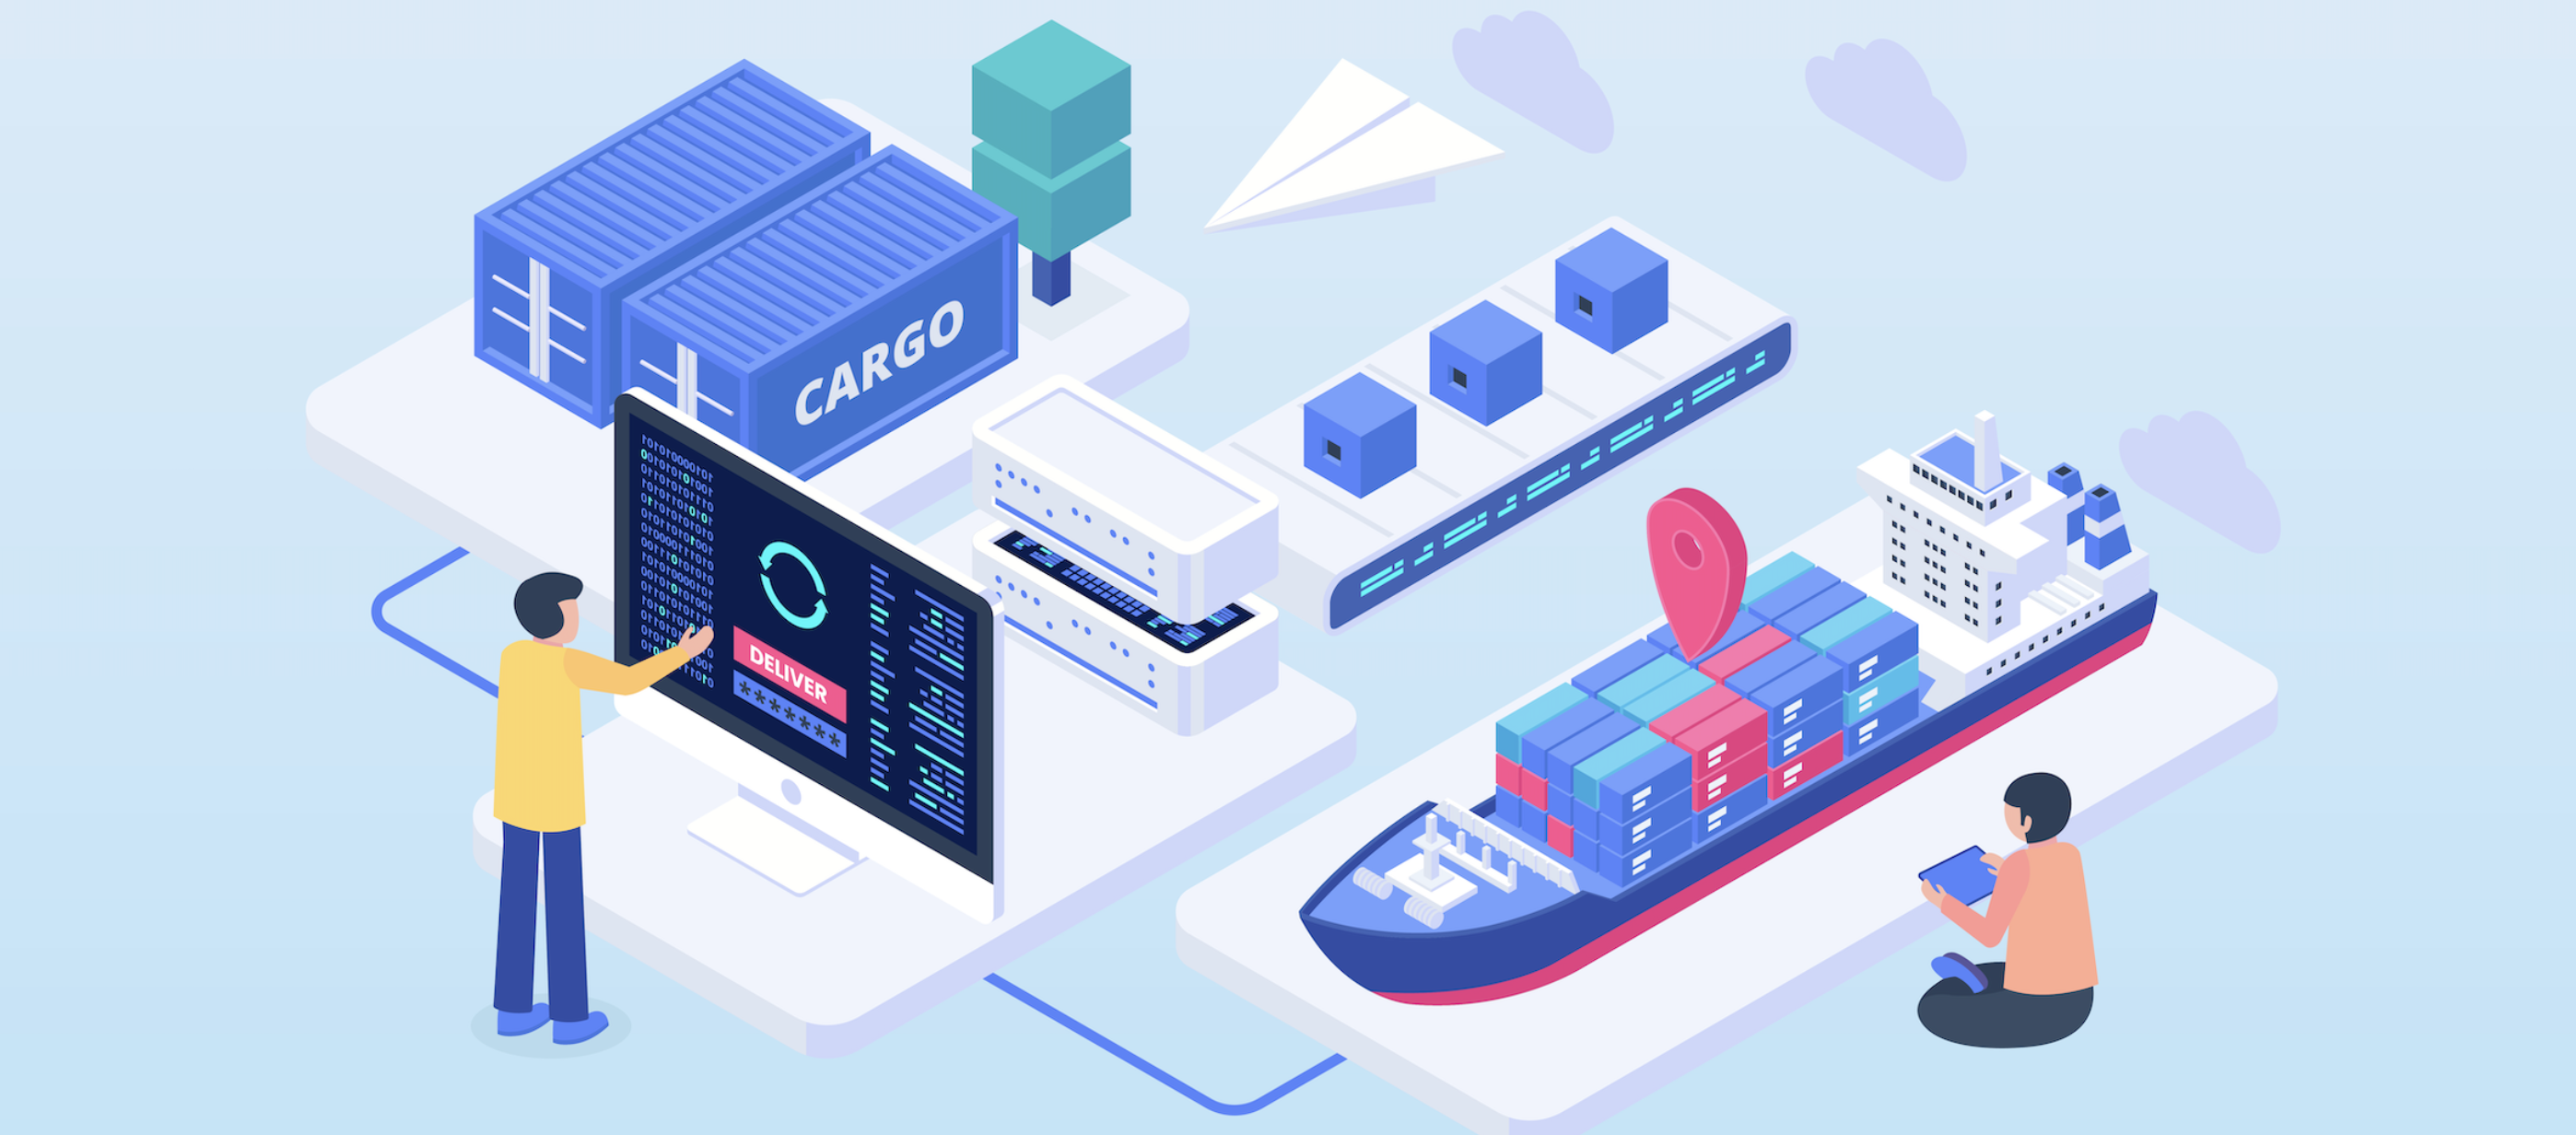


<H1 size =10><center>IE Reinforement Learning 2023 </center></H1>
<HR></HR>
<H2 size =7><center> Constrained Optimization </center></H2>

**Table of contents**<a id='toc0_'></a>
- [Libraries](#toc1_1_)
- [<font color="#098e83">0.Libaries </font>](#toc2_)
- [<font color="#098e83"> 1. Supply Chain Optimization for Diabetes Care Products </font>](#toc3_)
  - [Features](#toc3_1_)
- [<font color="#098e83"> 2.  Diabetes Care Products Dataset</font>](#toc4_)
- [<font color="#098e83"> 3. Forecasting</font>](#toc5_)
    - [Two Forecast Proposals: ARIMA and LSTM on all items](#toc5_1_1_)
- [<font color="#098e83"> 3.1. ARIMA </font>](#toc6_)
- [<font color="#098e83"> 3.1. Autocorrelation</font>](#toc7_)
- [<font color="#098e83"> 3.1.2 MAPE and Forecast from ARIMA </font>](#toc8_)
- [<font color="#098e83"> 3.2 LSTM </font>](#toc9_)
- [<font color="#098e83"> 4.1 Capacity by Product Types </font>](#toc10_)
    - [Medical Product Allocation for Global Distribution](#toc10_1_1_)
- [<font color="#098e83"> 4.2 Cost by Product Types </font>](#toc11_)
- [<font color="#098e83"> 4.3 Historical Inventory levels </font>](#toc12_)
- [<font color="#098e83"> 4.4. Profit each product type by country </font>](#toc13_)
- [<font color="#098e83"> 5. Optimization </font>](#toc14_)
- [<font color="#098e83"> 5.1 Optimization for meters products </font>](#toc15_)
    - [Interpretation of the Results](#toc15_1_1_)
- [Constraints Block](#toc16_)
- [Functions](#toc17_)
  - [NonLinear Programming](#toc17_1_)
- [5.2. Model 1 : **SLSQP MODEL (Sequential Least SQuares Programming)- gradient-free optimization methods**](#toc18_)
    - [Interpretation of the Results](#toc18_1_1_)
  - [NonLinear Programming](#toc18_2_)
- [<span style='color:purple'> __5.3. Model 2: COBYLA (Constrained Optimization BY Linear Approximation )- gradient-free optimization methods__</span>](#toc19_)
- [<span style='color:#098e83'> Comparison</span>  <span style='color:mediumblue'> __SLSQP__</span> <span style='color:#098e83'> vs</span>  <span style='color:purple'> __COBYLA__</span>](#toc20_)
  - [NonLinear Programming](#toc20_1_)
- [<span style='color:dodgerblue'> __5.4. Model 3: Trust Region Constraint__</span>](#toc21_)
- [<span style='color:#098e83'> Comparison</span>  <span style='color:mediumblue'> __SLSQP__</span> <span style='color:#098e83'> vs</span>  <span style='color:dodgerblue'> __Trust Region constraint__</span>](#toc22_)
- [<font color="#098e83"> 4. Linear programming </font>](#toc23_)
- [Model 3: Pulp Model Block](#toc24_)
- [<span style='color:#098e83'> Comparison</span>  <span style='color:mediumblue'> __SLSQP__</span> <span style='color:#098e83'> vs</span>  <span style='color:dodgerblue'> __Pulp__</span>](#toc25_)
- [ Nonlinear Programming and Quasi-Newton methods.](#toc26_)
- [<span style='color:orange'> __Model 5: Broyden-Fletcher Goldfarb-Shanno (BFGS)__</span>](#toc27_)
- [<span style='color:#098e83'> Comparison</span>  <span style='color:mediumblue'> __SLSQP__</span> <span style='color:#098e83'> vs</span>  <span style='color:orange'> __BFGS__</span>](#toc28_)
- [<font color="#098e83"> Distributed Evolutionary Algorithms in Python (DEAP) - Evolutionary </font>](#toc29_)
- [<span style='color:#098e83'> Comparison</span>  <span style='color:mediumblue'> __SLSQP__</span> <span style='color:#098e83'> vs</span>  <span style='color:orange'> __DEAP__</span>](#toc30_)
- [Pyomo](#toc31_)
- [<font color="#098e83"> Others</font>](#toc32_)
- [<font color="#098e83"> Gekko</font>](#toc33_)

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[0. Libraries](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_absolute_error  # Add this import at the beginning of your code


In [ ]:
!pip install pulp
!pip install pyomo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 65.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00


# <a id='toc3_'></a>[1. Supply Chain Optimization for Diabetes Care Products](#toc0_)


As a supply chain manager, our primary responsibility is managing the production, forecast, and inventory levels of diabetes care products for the Asia-Pacific (APAC) region. We manufacture and distribute a variety of products, including glucose testing strips, meters, and ancillary supplies. Each product variant caters to a specific country within APAC due to language localization requirements. Our ultimate goal is to🎯 **optimize operations** and 💰 **maximize profits**, while ensuring the needs of diverse markets are met.

Here are the key tasks we undertake:

*  🏭 __Production Management__: Our portfolio consists of glucose testing strips, meters, and ancillaries, each produced with distinct language requirements for various countries in APAC. We operate under certain production constraints, with both variable and fixed production costs to consider.

*  📈 __Demand Management__: Over a period of 3 years, we must meet the fluctuating demand for these diabetes care products. It's essential to align production with demand to prevent overproduction or shortages.

* 🔮  __Forecast Management__: We employ forecasting models to predict future demand for each product type and for each country. This forecast aids in shaping our production strategy and ensuring we are prepared for market changes.

*  💹__Profit Optimization__: We strive to maximize overall profits while navigating the various aspects of our supply chain. Profit per product is calculated as the selling price minus variable production costs, fixed costs, and shipping costs.

*  ⏳ __Time Dimension__: All these tasks are conducted within a dynamic 3-year timeframe. As demand, costs, and other factors evolve, our strategies must adapt accordingly.

Our Python notebook uses data analysis, time series forecasting (ARIMA), and optimization techniques (SciPy) to manage these aspects. The primary points we consider are:

*  💼 __Capacity__: Total production must not exceed the manufacturing capacity.

*  🛒 __Demand__: Production levels should align with the forecasted demand for each product type in each country.

*  📊 __Forecast__: An ARIMA model is used to forecast the demand for the next 36 months. Regular updates with the latest data ensure our forecast remains accurate and useful. At the same time we are running an LSTM model to compare results

*  🚀 __Profits__: The objective function is to maximize overall profit, considering selling price, variable production costs, fixed costs, and shipping costs.

*   🕐 __Time Dimension__: We run the model each month over a 3-year period, allowing us to respond to changing demand, forecasts, and costs over time.




</div>

# <a id='toc4_'></a>[2. Diabetes Care Products Datasets](#toc0_)

In this context, we are delving into theoretical study involving a diabetes care manufacturer. Our focus will be specifically on the Asia-Pacific (APAC) region. This manufacturer produces a range of diabetes care products:
*   __glucose testing strips__
*   __meters__
*   __ancillary supplies__


**Domain Background**
Diabetes patients needs to constantly check their blood sugar level to initiate a counter action in case it is to high or low. The testing strip is used to take a small blood sample normally from the finger. The strip is then introduced to the meter which gives the numeric value of the blood sugar and depending on the model also some recommendation what to do next. Anciallary supplies are used in additon



In [ ]:
#Show all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#Read in in Colab, needs to upload the file
file_path = '/content/Forecast.xlsx'

In [ ]:
# Read the Excel file, specifying the sheet name and the range of rows to read
df = pd.read_excel(file_path, sheet_name='Order')


# Convert all column names to string
df.columns = df.columns.astype(str)

# Find the column indices for "Order History" (case insensitive)
order_history_cols = df.columns[df.columns.str.lower().str.contains('order history')]

if not order_history_cols.empty:
    # Filter the DataFrame to include only columns up to January 2021
    df = df.iloc[:, :df.columns.get_loc(order_history_cols[-1]) + 31]

    # Filter out rows that do not contain the 'Order History' string in the specified columns
    df = df[df[order_history_cols].apply(lambda row: row.str.contains('Order History', case=False)).any(axis=1)]

    # Remove unnecessary columns
    df = df.drop(columns=order_history_cols)

    # Display the filtereOHd DataFrame
    df
else:
    print("No 'Order History' columns found")

For simplicity we remove Promo Items as these are materials in another production site and Re-exporting market

In [ ]:
#remove Promo items in Product Type column
df = df[df['Product Type'] != 'Promo Items']
# remove Re-exporting market in Sub Cluster column
df = df[df['Sub Cluster'] != 'Re-exporting market']

In [ ]:
# Melt the dataframe from wide to long format
df_melt = df.melt(id_vars=['Sub Cluster', 'Product Type'], var_name='Date', value_name='Actual Demand')
df_melt['Actual Demand'] = pd.to_numeric(df_melt['Actual Demand'])


# Convert 'Date' column to datetime format
df_melt['Date'] = pd.to_datetime(df_melt['Date'], format='%b%y')  # assuming the date format is like 'Jul18'

In [ ]:
df_demand = df_melt

In [ ]:
# List of unique product types
product_types = df_demand['Product Type'].unique()

# List of unique sub clusters
sub_clusters = df_demand['Sub Cluster'].unique()

# Create a color dictionary for sub clusters
color_dict = dict(zip(sub_clusters, ['red', 'blue', 'green'])) # Add more colors if you have more sub clusters

# Create subplots: one for each product type
fig = make_subplots(rows=len(product_types), cols=1, subplot_titles=product_types)

for i, product_type in enumerate(product_types, start=1):
    df_product = df_demand[df_demand['Product Type'] == product_type]
    for sub_cluster in sub_clusters:
        df_subcluster = df_product[df_product['Sub Cluster'] == sub_cluster]
        fig.add_trace(
            go.Scatter(
                x=df_subcluster['Date'],
                y=df_subcluster['Actual Demand'],
                mode='lines',
                name=sub_cluster,
                line=dict(color=color_dict[sub_cluster]),
                #showlegend=(i==1) # Show legend only in the first subplot to avoid repetition
            ),
            row=i, col=1
        )

# Update layout
fig.update_layout(height=600, width=900, title_text="Time Series:  Historical Demand Product by Type and Country", title_x=0.5)
fig.show()


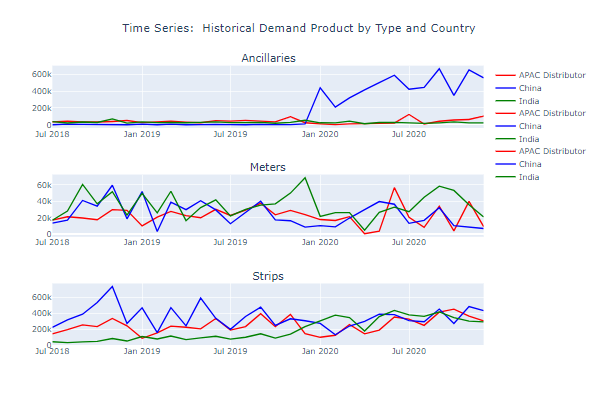

In the underlying data we see that especially Anicallaries in China had an increasing demand in 2020. Historical explanation is the beginning of the Covid Panddemic.

For Meters we can see that all three regions are quite close to each other in terms of demand with a few spikes that look more seasons.

For Strip China and APAC in general had a higher demand up until end of 2019. With beginning of the Covid Crisis also India had more demand. Which will make the accuarcy harder to forecast

# <a id='toc5_'></a>[3. Forecasting](#toc0_)

## <a id='toc5_1_'></a>[3.1 Forecasting ARIMA](#toc0_)

Forecast using ADF test - testing for stationary whether your time series has a unit root or not, i.e., whether it is stationary which means a sort of trend, or is hard to be predicted. The null hypothesis of the ADF test is that the time series has a unit root (and is non-stationary). If the test statistic is less than the critical value, then you can reject the null hypothesis and assume that the time series is stationary.

*   __APAC Distributor - Ancillaries, Meters, and Strips__: The p-values are less than 0.05, so we can reject the hypothesis that these series are non-stationary. That means these series are <span style='color:#098e83'> __stationary__</span>.

*   __China - Ancillaries__: The p-value is greater than 0.05, so we can't reject the hypothesis that the series is non-stationary. That means the series is  __non-stationary__. Here we had a frozen period due to change of supplier and manufacturing side.

*   __China - Meters and Strips__: The p-values are less than 0.05, so we can reject the hypothesis that these series are non-stationary. That means these series are <span style='color:#098e83'> __stationary__</span>.

*   __India - Ancillaries,Strips__: The p-value is greater than 0.05, so we can't reject the hypothesis that the series is non-stationary. That means the series is  __non-stationary__.

*   __India - Meters__: The p-value is less than 0.05, so we can reject the hypothesis that the series is non-stationary. That means this series is  <span style='color:#098e83'> __stationary__</span>.


In [ ]:
# get unique combinations of 'Sub Cluster' and 'Product Type'
clusters = df['Sub Cluster'].unique()
product_types = df['Product Type'].unique()

for cluster in clusters:
    for product_type in product_types:
        subset = df[(df['Sub Cluster'] == cluster) & (df['Product Type'] == product_type)]
        subset = subset.drop(['Sub Cluster', 'Product Type'], axis=1)

        # convert DataFrame row to series (there should be only one row per subset)
        series = subset.iloc[0]

        # apply Dickey-Fuller test
        result = adfuller(series)
        print(f'Dickey-Fuller test for {cluster} - {product_type}')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])

Dickey-Fuller test for APAC Distributor - Ancillaries
ADF Statistic: -3.399142
p-value: 0.010988
Dickey-Fuller test for APAC Distributor - Meters
ADF Statistic: -6.798046
p-value: 0.000000
Dickey-Fuller test for APAC Distributor - Strips
ADF Statistic: -3.670085
p-value: 0.004554
Dickey-Fuller test for China - Ancillaries
ADF Statistic: 0.294667
p-value: 0.977098
Dickey-Fuller test for China - Meters
ADF Statistic: -4.668164
p-value: 0.000097
Dickey-Fuller test for China - Strips
ADF Statistic: -5.443052
p-value: 0.000003
Dickey-Fuller test for India - Ancillaries
ADF Statistic: -2.735998
p-value: 0.068013
Dickey-Fuller test for India - Meters
ADF Statistic: -3.808604
p-value: 0.002821
Dickey-Fuller test for India - Strips
ADF Statistic: -1.410015
p-value: 0.577466


Indian Ancilliaries and stips as well the Ancilliaries of China are not stationary. Since these items seems to be impacted by Covid. We will try to remove some historical data and test if the items become more stationary.  For India it becomes stationary in the unit root when you only look at January 2020, for China as of May 2020.

In [ ]:
# Get unique subclusters
subclusters = df_demand['Sub Cluster'].unique()

for subcluster in subclusters:
    subset = df_demand[(df_demand['Sub Cluster'] == subcluster) & (df_demand['Product Type'] == 'Ancillaries') & (df_demand['Date'] >= '2020-05-01')]

    # Apply Dickey-Fuller test
    result = adfuller(subset['Actual Demand'])
    print(f'Dickey-Fuller test for {subcluster} - Ancillaries (after January 2020)')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Dickey-Fuller test for APAC Distributor - Ancillaries (after January 2020)
ADF Statistic: -2.886393
p-value: 0.046953
Dickey-Fuller test for China - Ancillaries (after January 2020)
ADF Statistic: -3.468066
p-value: 0.008846
Dickey-Fuller test for India - Ancillaries (after January 2020)
ADF Statistic: -34.746534
p-value: 0.000000


### <a id='toc5_1_1_'></a>[3.1.1 Autocorrelation](#toc0_)

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to figure out the order of Auto-Regressive, Moving Average Models and ARMA models.
Examining the graphics for autocorrelation helps us identify any significant relationships between a time series and its lagged values, allowing us to detect patterns and dependencies that can inform forecasting and modeling decisions.

ACF measures the correlation between a time series and lagged values. If the ACF plot shows slow decay, it typically indicates that the series can be represented well by a MA (Moving Average) model.

PACF: PACF measures the correlation between a time series and its lagged values while controlling for the values at all shorter lags. If the PACF plot shows a sharp cut-off and/or a gradual decay, it typically indicates that the series can be represented well by an AR (Autoregressive) model


For each product by country we look at the Autocorrelation and Partical Autocorrelation. It gives us an indication if we have to take lag difference, if there is seasonality etc.

Additionally, you can see a blue area in the ACF and PACF plots. This blue area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero. Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1

Trend: China Ancillaries, India Strips

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



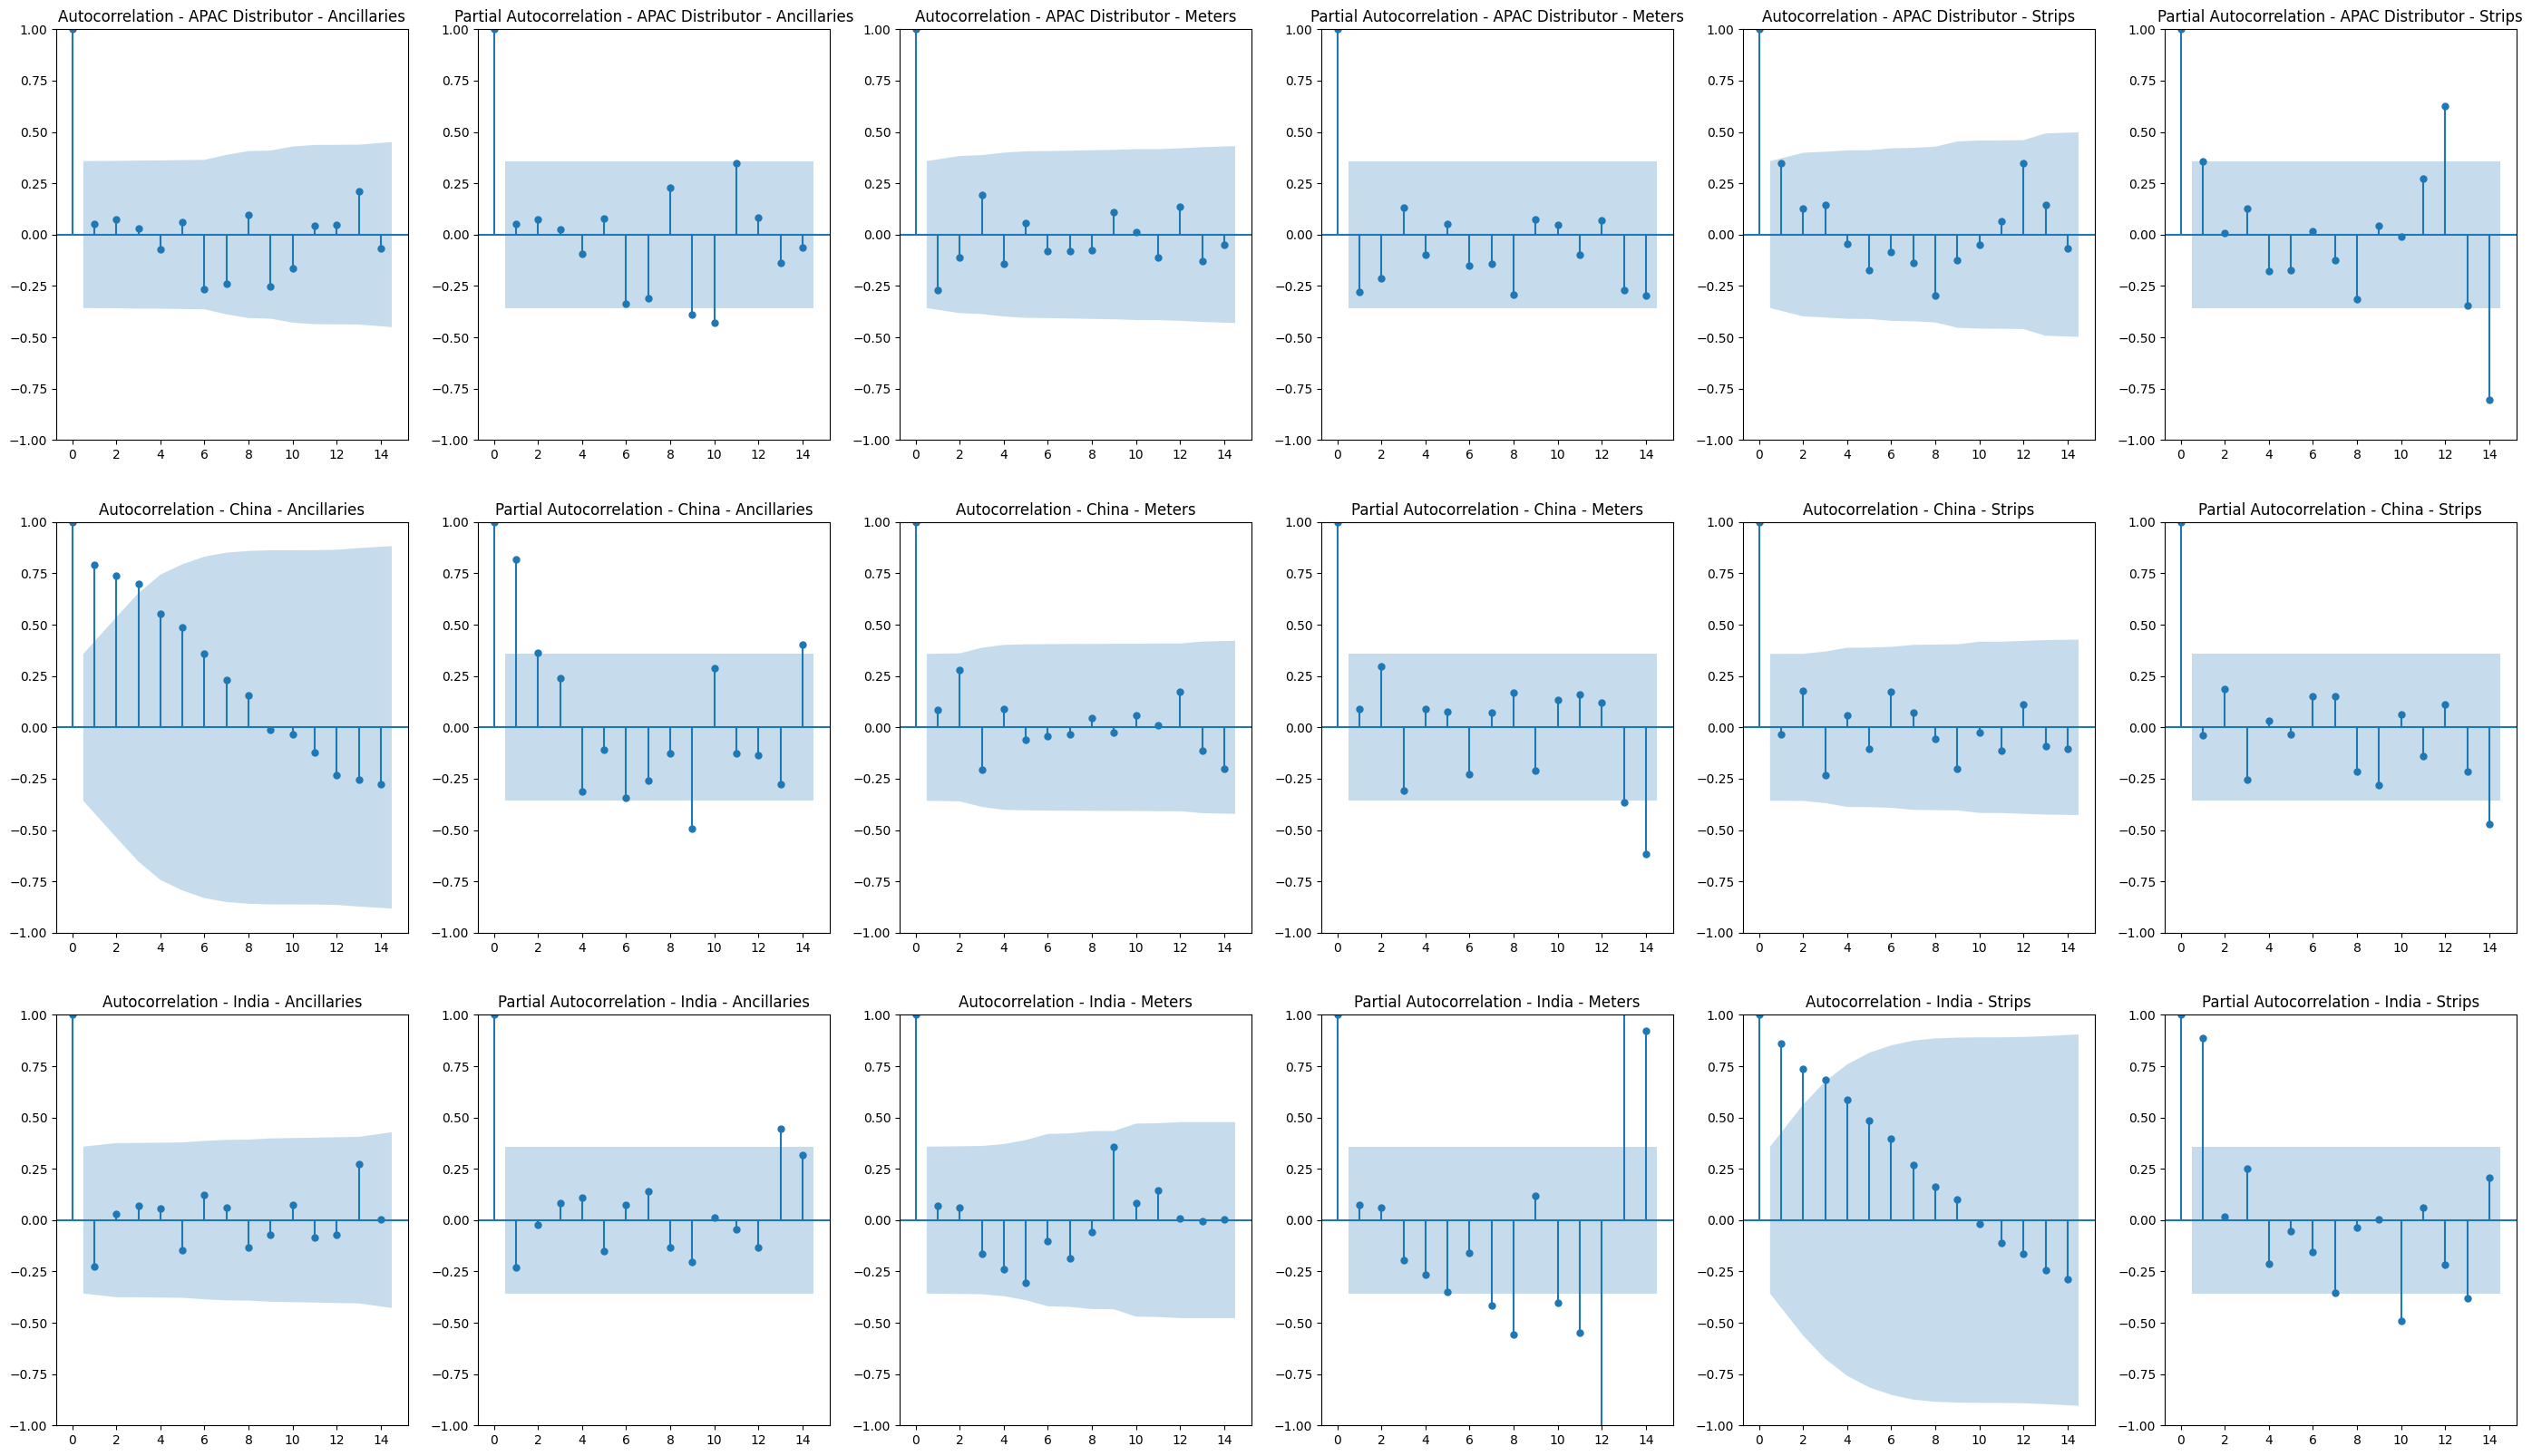

In [ ]:
# Get unique subclusters and product types
product_types = df_demand['Product Type'].unique()

nlags = 14 # Number of lags to include

# Determine the number of rows and columns for the subplot grid
num_rows = len(clusters)
num_cols = len(product_types) * 2  # Multiply by 2 for both autocorrelation and partial autocorrelation

# Create subplots with multiple rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 20), squeeze=False)

for i, subcluster in enumerate(clusters):
    for j, product_type in enumerate(product_types):
        subset = df_demand[(df_demand['Sub Cluster'] == subcluster) & (df_demand['Product Type'] == product_type)]

        # Convert the 'Value' column to a time series
        y = subset['Actual Demand']

        # Plot autocorrelation
        plot_acf(y, lags=nlags, ax=axes[i, 2*j])
        axes[i, 2*j].set_title(f'Autocorrelation - {subcluster} - {product_type}')

        # Plot partial autocorrelation
        plot_pacf(y, lags=nlags, ax=axes[i, 2*j+1])
        axes[i, 2*j+1].set_title(f'Partial Autocorrelation - {subcluster} - {product_type}')



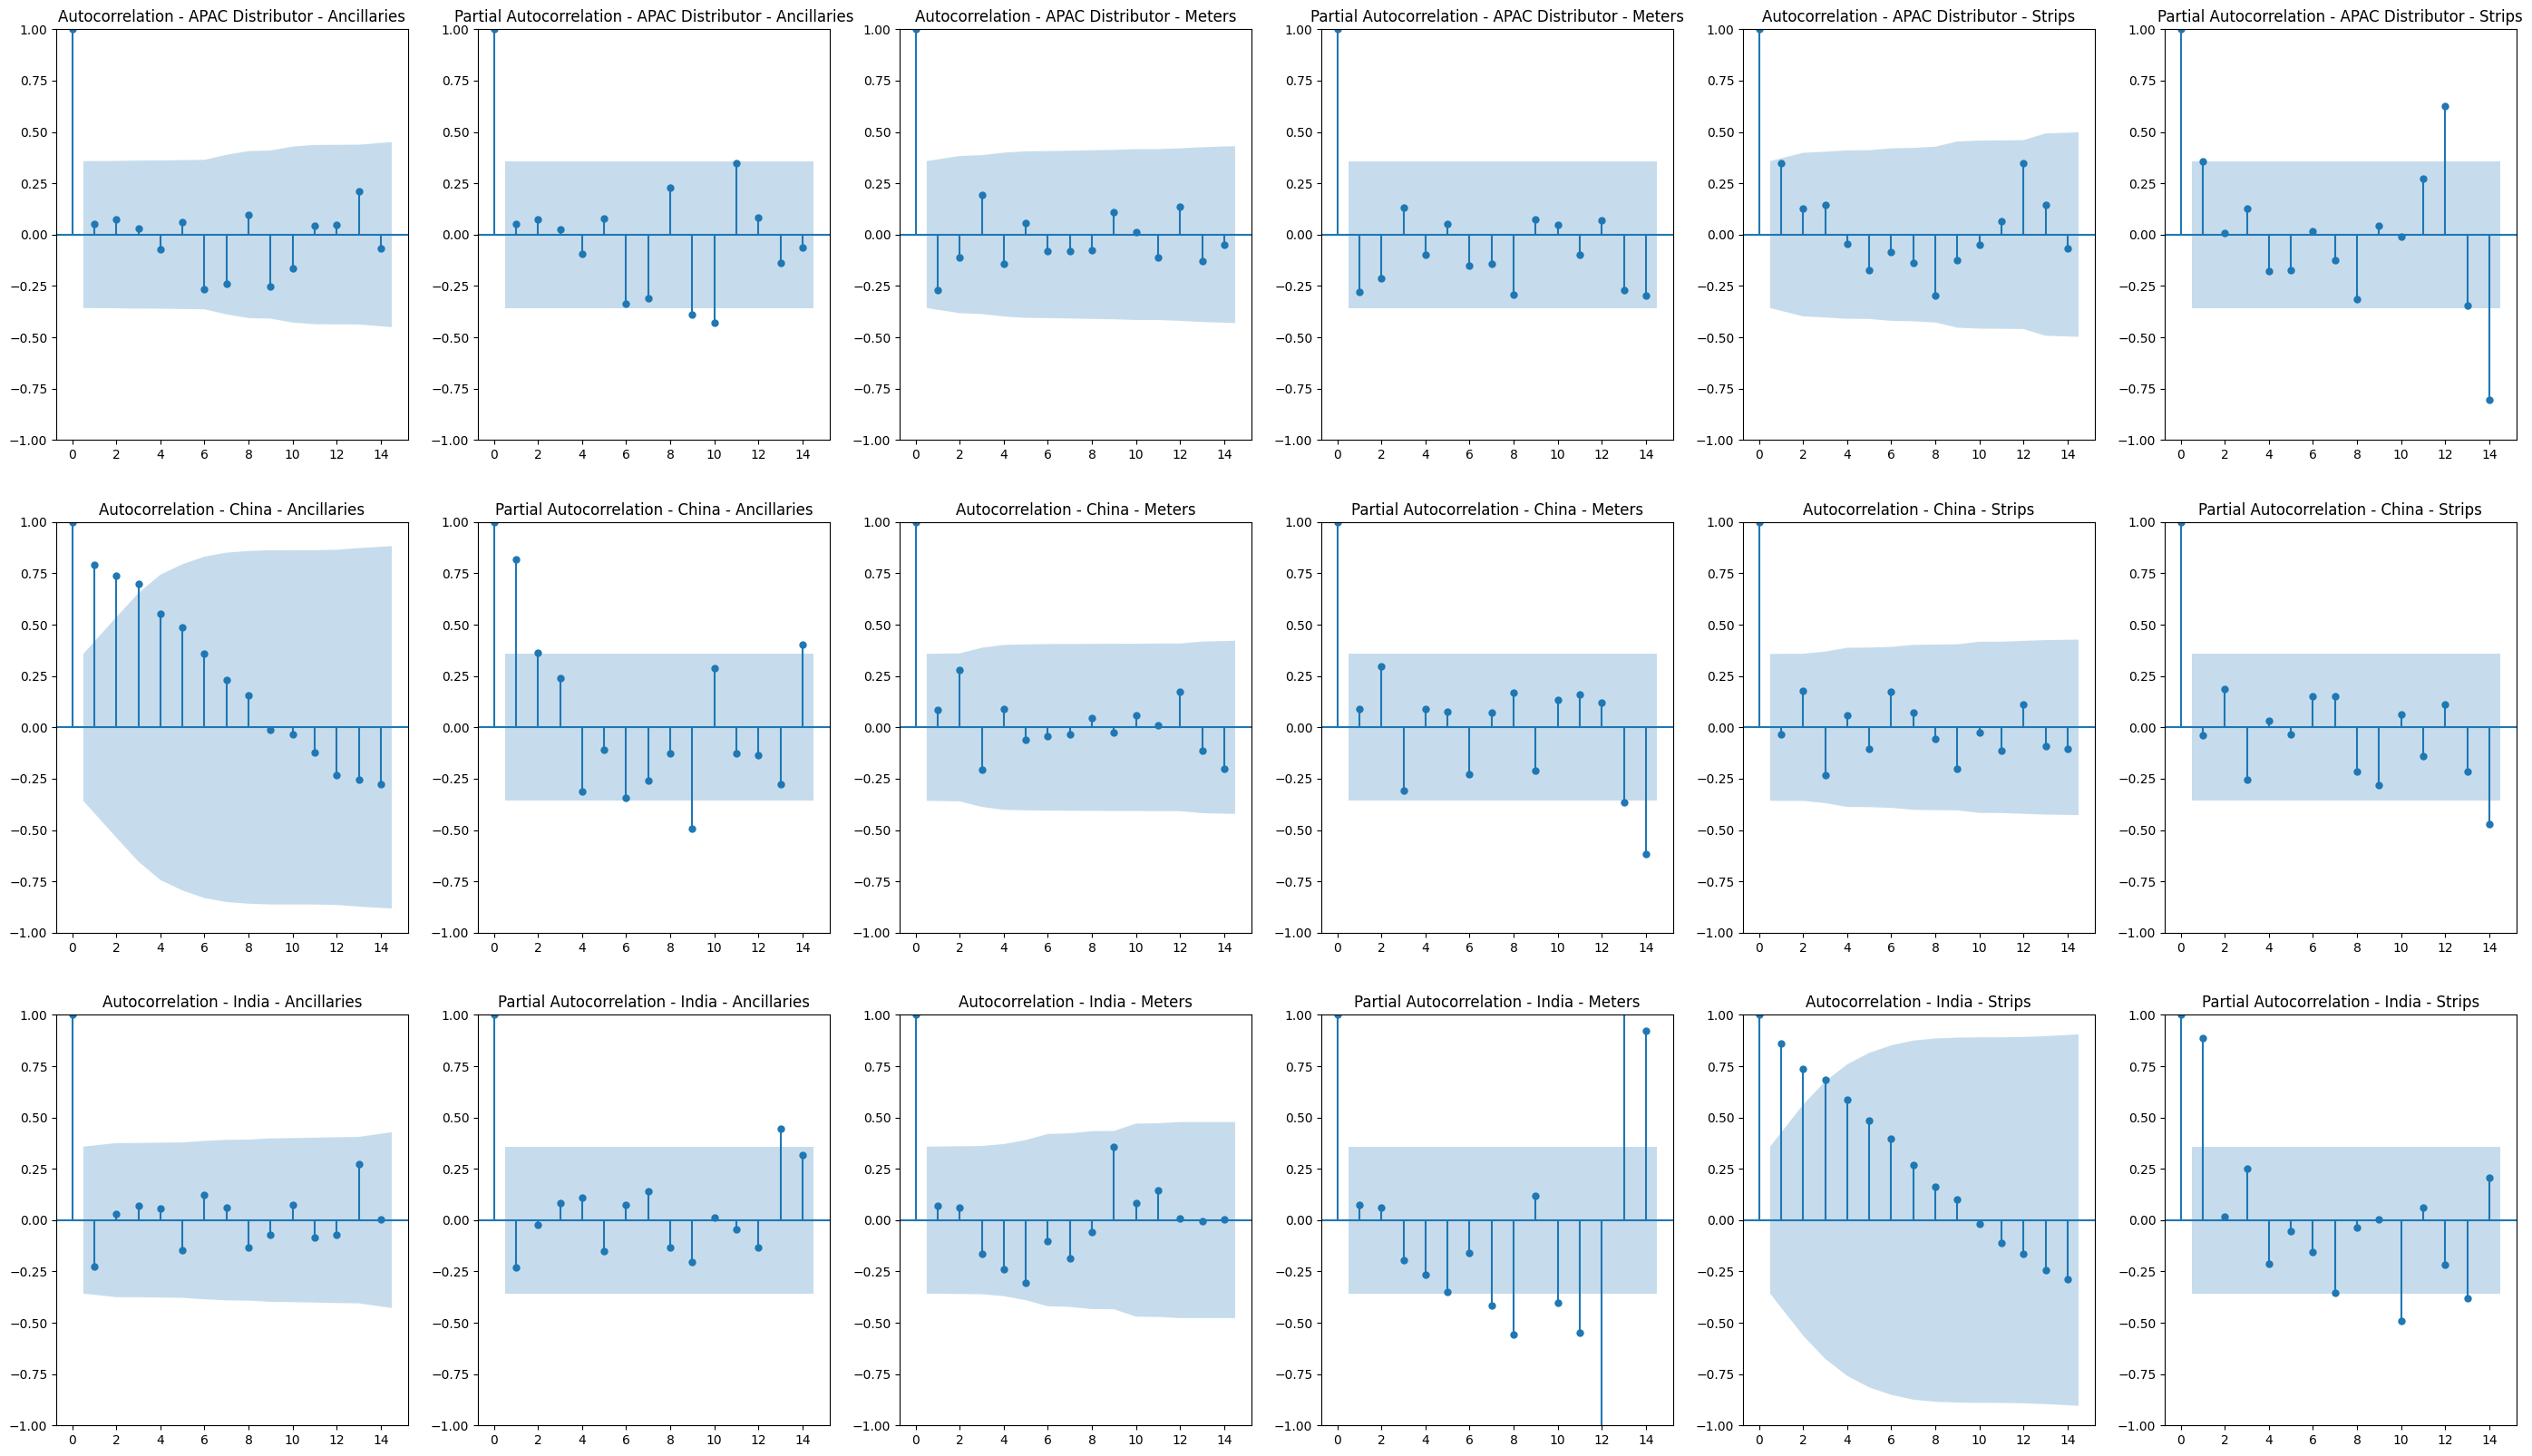

### <a id='toc5_1_2_'></a>[3.1.2 MAPE and Forecast from ARIMA](#toc0_)

For the ones with stationary we propose the following forecasts

Low MAPE / MAE achieved for:

*   APAC Distributor - Strips
*   China - Strip
*   India - Ancillaries
*   India - Meters

High MAPE / MAE

*   APAC Distributor - Ancilliaries
*   APAC Distributor - Meters
*   China - Meters

In [ ]:
# Create an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame(columns=['Sub Cluster', 'Product Type', 'Date', 'Forecasted Demand'])

Below graphs you can see the performance of the different items versus the actuals.

Forecast for APAC Distributor - Ancillaries:


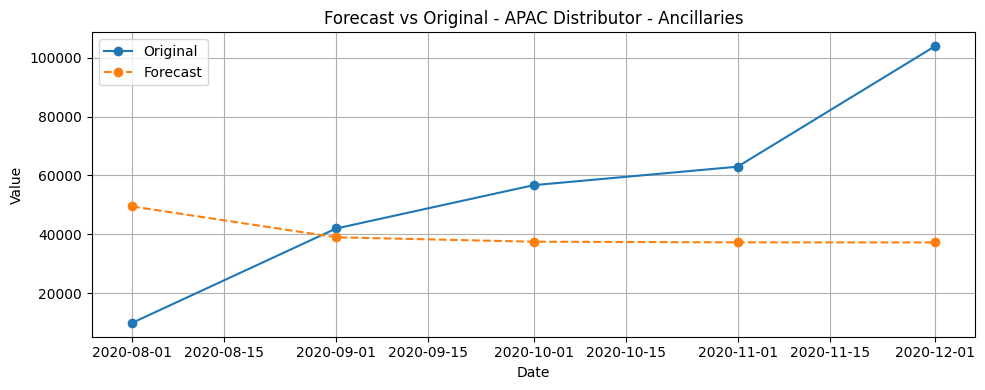

MAPE: 1.0977597581895688
MAE: 30871.99973012087
MSE: 1414061569.6335003

Forecast for APAC Distributor - Meters:


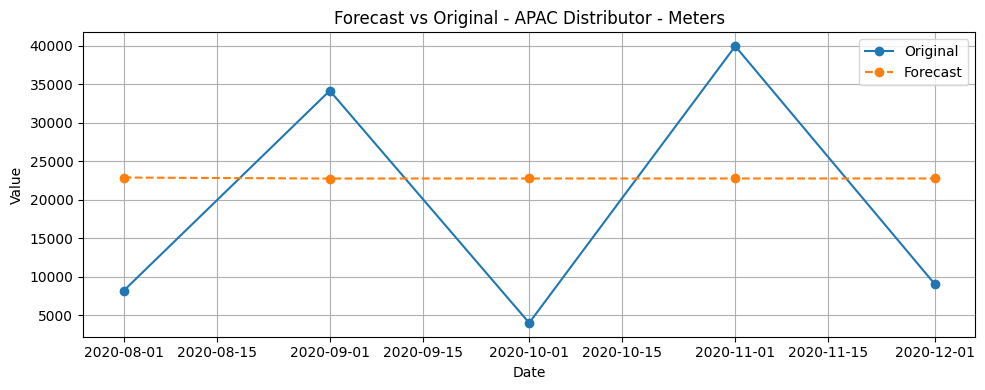

MAPE: 1.7513541277116929
MAE: 15158.592036164588
MSE: 236476424.26590952

Forecast for APAC Distributor - Strips:


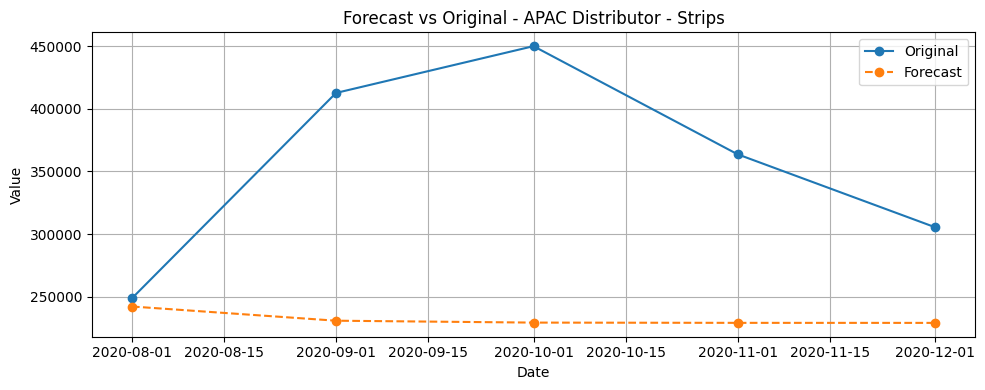

MAPE: 0.31523075372786036
MAE: 123902.29915273988
MSE: 21117013102.739532

Forecast for China - Meters:


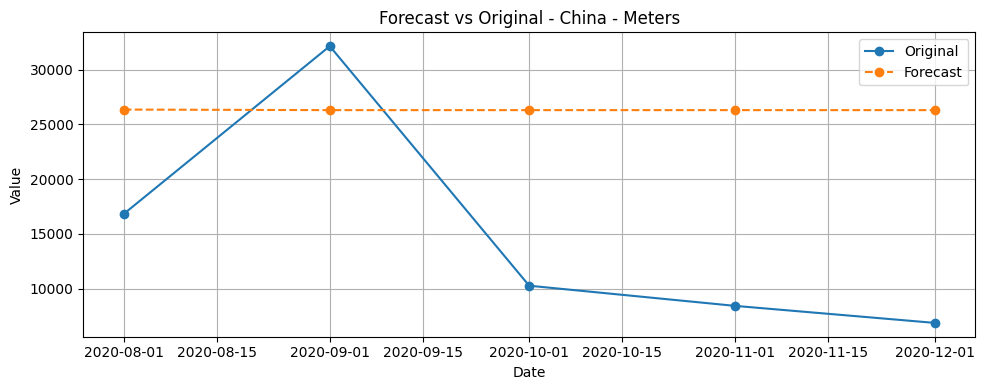

MAPE: 1.4505073815752765
MAE: 13741.579092367198
MSE: 215798299.83274332

Forecast for China - Strips:


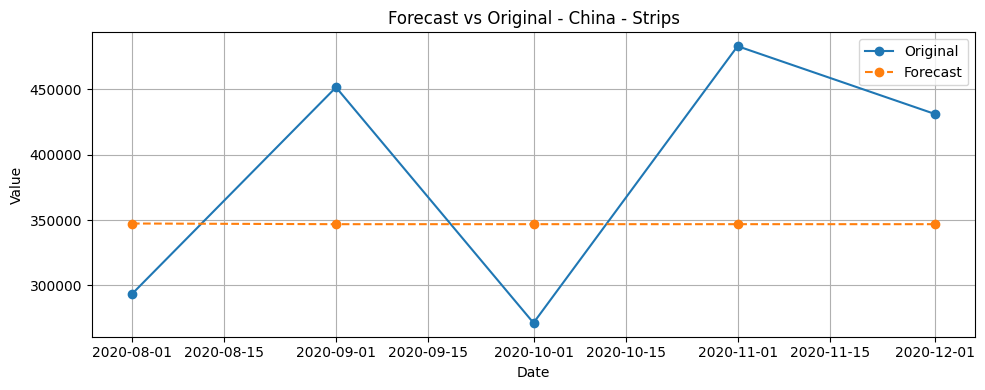

MAPE: 0.23405384105609744
MAE: 90817.58975557543
MSE: 9023245991.531796

Forecast for India - Ancillaries:


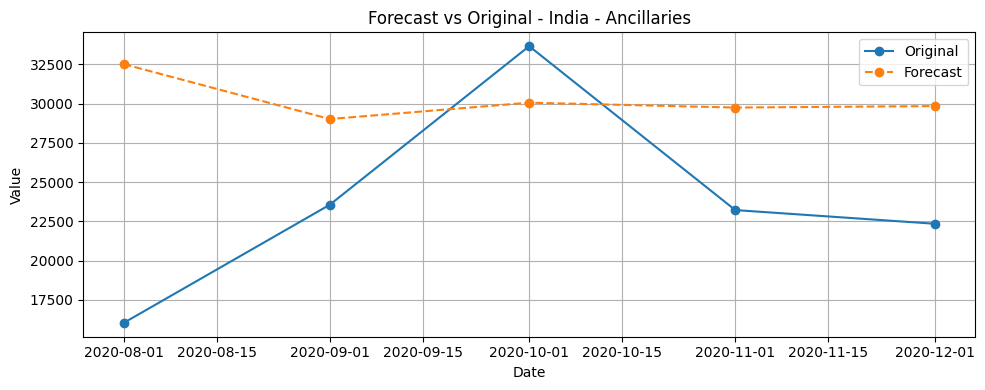

MAPE: 0.3965224625723624
MAE: 7912.254066143041
MSE: 82629321.77764615

Forecast for India - Meters:


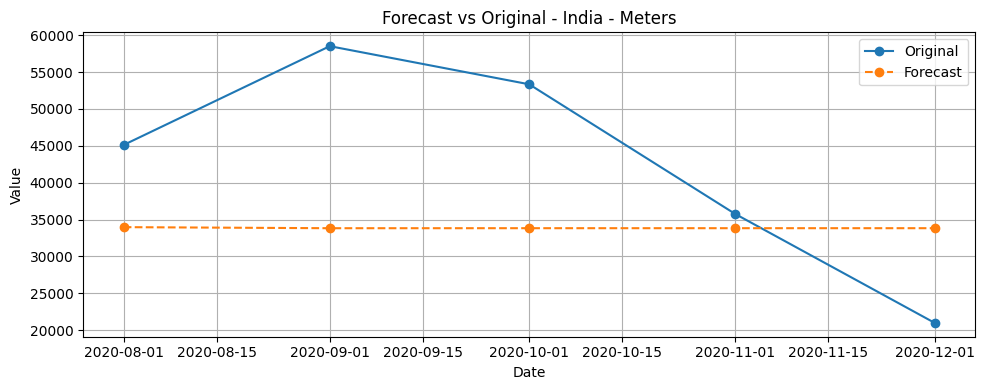

MAPE: 0.3399634246879614
MAE: 14019.250965273211
MSE: 256467695.0470725

        Sub Cluster Product Type      MAPE            MAE           MSE
0  APAC Distributor  Ancillaries  1.097760   30871.999730  1.414062e+09
1  APAC Distributor       Meters  1.751354   15158.592036  2.364764e+08
2  APAC Distributor       Strips  0.315231  123902.299153  2.111701e+10
3             China       Meters  1.450507   13741.579092  2.157983e+08
4             China       Strips  0.234054   90817.589756  9.023246e+09
5             India  Ancillaries  0.396522    7912.254066  8.262932e+07
6             India       Meters  0.339963   14019.250965  2.564677e+08


In [ ]:
from sklearn.metrics import mean_squared_error

# Suppress the value warning
warnings.filterwarnings("ignore")

# Create an empty DataFrame to store forecast metrics
forecast_metrics_df = pd.DataFrame(columns=['Sub Cluster', 'Product Type', 'MAPE', 'MAE', 'MSE'])

# Define the sub-clusters and product types of interest
sub_clusters = ['APAC Distributor', 'China', 'India']
product_types = {'APAC Distributor': ['Ancillaries', 'Meters', 'Strips'],
                 'China': ['Meters', 'Strips'],
                 'India': ['Ancillaries','Meters']}

# Loop over each sub-cluster and product type
for sub_cluster in sub_clusters:
    for product_type in product_types[sub_cluster]:
        print(f"Forecast for {sub_cluster} - {product_type}:")

        # Filter the data for the specific sub-cluster and product type
        subset = df_demand[(df_demand['Sub Cluster'] == sub_cluster) & (df_demand['Product Type'] == product_type)]

        # Sort the data by date in ascending order
        subset = subset.sort_values('Date')

        # Set the 'Date' column as the index
        subset = subset.set_index('Date')

        # Extract the 'Value' column as the time series data
        data = subset['Actual Demand']

        # Split the data into training and test sets
        train_data = data[:-5]
        test_data = data[-5:]

        # Fit the ARIMA model
        order = (1, 0, 0)  # Set the order of the ARIMA model
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()

        # Forecast the next 5 months
        forecast = model_fit.forecast(steps=5)

        # Calculate MAPE for the test set
        mape = mean_absolute_percentage_error(test_data, forecast)

        # Calculate MAE for the test set
        mae = mean_absolute_error(test_data, forecast)

        # Calculate MSE for the test set
        mse = mean_squared_error(test_data, forecast)

        # Append the forecast metrics to the DataFrame
        forecast_metrics_df = forecast_metrics_df.append({
            'Sub Cluster': sub_cluster,
            'Product Type': product_type,
            'MAPE': mape,
            'MAE': mae,
            'MSE': mse
        }, ignore_index=True)

        # Append the forecast to the DataFrame for Code 1
        forecast_dates = forecast.index  # extract dates from forecast
        for f_date, f_value in zip(forecast_dates, forecast.values):
            forecast_df.loc[len(forecast_df)] = [sub_cluster, product_type, f_date, f_value]

        # Plot the forecast and the original values
        plt.figure(figsize=(10, 4))
        plt.plot(test_data.index, test_data.values, label='Original', marker='o')
        plt.plot(forecast.index, forecast.values, label='Forecast', linestyle='--', marker='o')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'Forecast vs Original - {sub_cluster} - {product_type}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Output the forecast metrics
        print("MAPE:", mape)
        print("MAE:", mae)
        print("MSE:", mse)
        print()

# Display the forecast metrics DataFrame
print(forecast_metrics_df)


For the nonstationary items we need a different model either a different Arima model or another forecast model

For the  China Ancillaries and India strips  we are going to take the ARIMA(2,2,0) and see if the forecast gets better. All variables are significant for Arima Lag 1 and Arima Lag 2 ( ar.L1, ar.L2). For China we have a lowe MAE and MAPE with China - Ancillaries: 0.19%.  For India Strips is moderate: India - Strips: 0.496%

ACF and PACF for China - Ancillaries:
                               SARIMAX Results                                
Dep. Variable:          Actual Demand   No. Observations:                   30
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -369.359
Date:                Wed, 21 Jun 2023   AIC                            744.719
Time:                        13:18:11   BIC                            748.716
Sample:                    07-01-2018   HQIC                           745.941
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2287      0.147     -8.344      0.000      -1.517      -0.940
ar.L2         -0.7235      0.167     -4.331      0.000      -1.051      -0.396
sigma2      1.

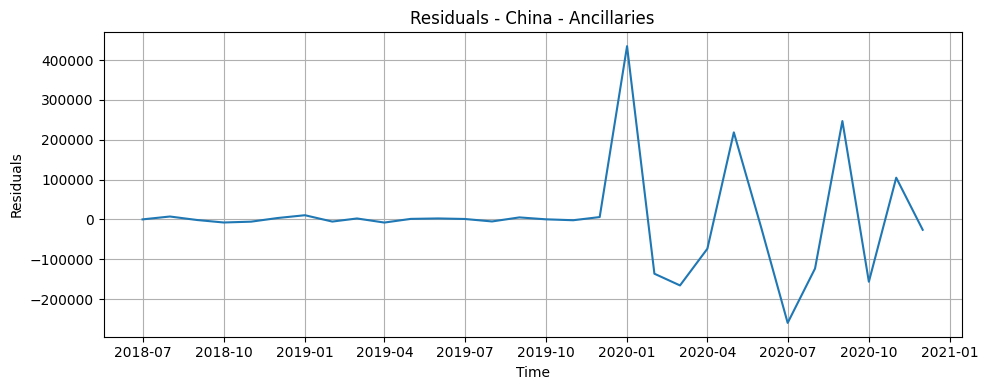

<Figure size 1000x400 with 0 Axes>

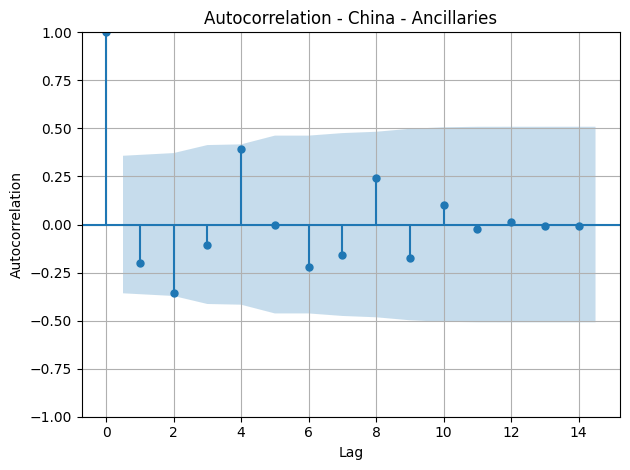

<Figure size 1000x400 with 0 Axes>

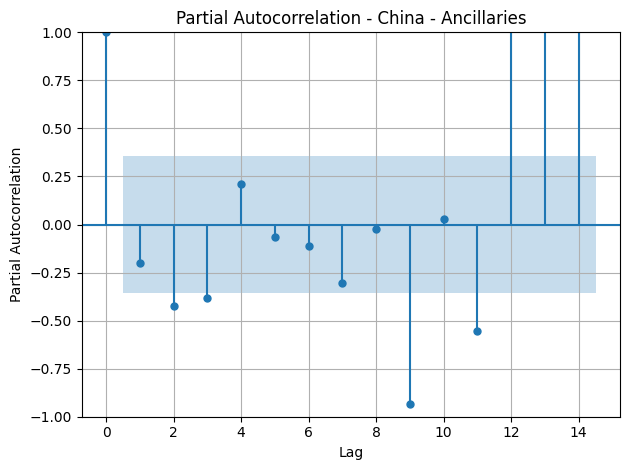

Mean Absolute Error (MAE) for China - Ancillaries: 85041.41768204639
Mean Absolute Percentage Error (MAPE) for China - Ancillaries: 0.19874275666984023%
ACF and PACF for India - Strips:
                               SARIMAX Results                                
Dep. Variable:          Actual Demand   No. Observations:                   30
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -353.636
Date:                Wed, 21 Jun 2023   AIC                            713.273
Time:                        13:18:12   BIC                            717.270
Sample:                    07-01-2018   HQIC                           714.495
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6528   

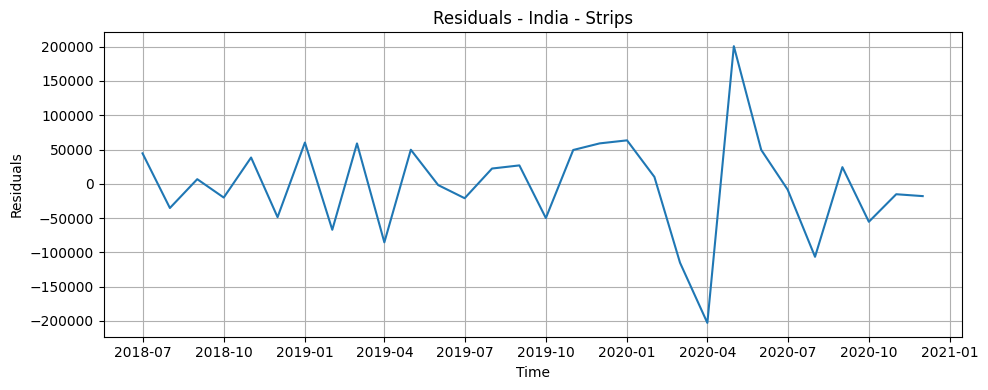

<Figure size 1000x400 with 0 Axes>

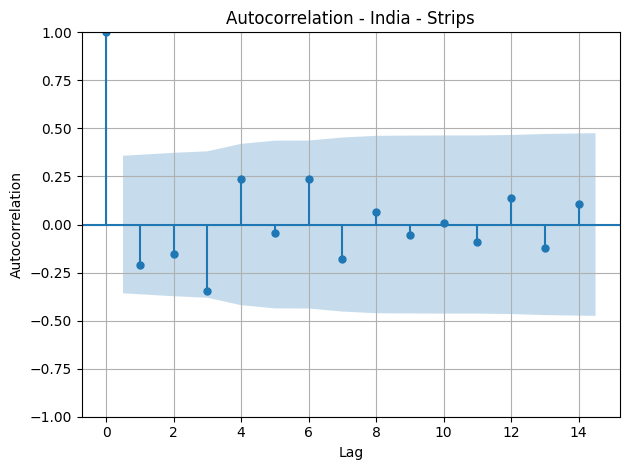

<Figure size 1000x400 with 0 Axes>

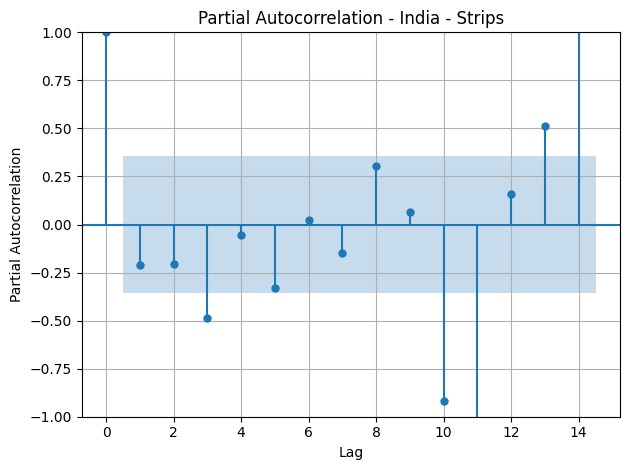

Mean Absolute Error (MAE) for India - Strips: 168007.51766739812
Mean Absolute Percentage Error (MAPE) for India - Strips: 0.4960230845067251%


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Define the sub-clusters and product types of interest
sub_clusters = ['China', 'India']
product_types = {'China': ['Ancillaries'],
                 'India': ['Strips']}

# Loop over each sub-cluster and product type
for sub_cluster in sub_clusters:
    for product_type in product_types[sub_cluster]:
        print(f"ACF and PACF for {sub_cluster} - {product_type}:")

        # Filter the data for the specific sub-cluster and product type
        subset = df_demand[(df_demand['Sub Cluster'] == sub_cluster) & (df_demand['Product Type'] == product_type)]

        # Sort the data by date in ascending order
        subset = subset.sort_values('Date')

        # Set the 'Date' column as the index
        subset = subset.set_index('Date')

        # Extract the 'Value' column as the time series data
        data = subset['Actual Demand']

        # Split data into training and test set
        train, test = data[:-5], data[-5:]

        # Fit the ARIMA model
        model = ARIMA(data, order=(2, 2, 0))
        model_fit = model.fit()
        print(model_fit.summary())

        # Make predictions on test set
        predictions = model_fit.forecast(steps=5)

        # Calculate the residuals
        residuals = model_fit.resid

        # Plot the residuals
        plt.figure(figsize=(10, 4))
        plt.plot(residuals)
        plt.xlabel('Time')
        plt.ylabel('Residuals')
        plt.title(f'Residuals - {sub_cluster} - {product_type}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot the ACF of residuals
        plt.figure(figsize=(10, 4))
        plot_acf(residuals, lags=nlags)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation - {sub_cluster} - {product_type}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot the PACF of residuals
        plt.figure(figsize=(10, 4))
        plot_pacf(residuals, lags=nlags, method='ols')
        plt.xlabel('Lag')
        plt.ylabel('Partial Autocorrelation')
        plt.title(f'Partial Autocorrelation - {sub_cluster} - {product_type}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Calculate and print MAE and MAPE
        mae = mean_absolute_error(test, predictions)
        mape = mean_absolute_percentage_error(test, predictions)
        print(f"Mean Absolute Error (MAE) for {sub_cluster} - {product_type}: {mae}")
        print(f"Mean Absolute Percentage Error (MAPE) for {sub_cluster} - {product_type}: {mape}%")

        # Append the forecast to the DataFrame for Code 2
        forecast_dates = predictions.index  # extract dates from predictions
        for f_date, f_value in zip(forecast_dates, predictions.values):
            forecast_df.loc[len(forecast_df)] = [sub_cluster, product_type, f_date, f_value]



In [ ]:
forecast_df

,Sub Cluster,Product Type,Date,Forecasted Demand
0,APAC Distributor,Ancillaries,2020-08-01,49459.241618
1,APAC Distributor,Ancillaries,2020-09-01,38962.776068
2,APAC Distributor,Ancillaries,2020-10-01,37454.381534
3,APAC Distributor,Ancillaries,2020-11-01,37237.617705
4,APAC Distributor,Ancillaries,2020-12-01,37206.467660
5,APAC Distributor,Meters,2020-08-01,22896.483770
6,APAC Distributor,Meters,2020-09-01,22763.903798
7,APAC Distributor,Meters,2020-10-01,22771.356658
8,APAC Distributor,Meters,2020-11-01,22770.937703
9,APAC Distributor,Meters,2020-12-01,22770.961254


In [ ]:
import plotly.graph_objects as go

def plot_actual_vs_forecast(actual_demand, forecast_demand, title, forecast_label):
    # Filter for meters
    actual_demand_meters = actual_demand[(actual_demand['Product Type'] == 'Meters')]
    forecast_demand_meters = forecast_demand[(forecast_demand['Product Type'] == 'Meters')]

    # Create the figure
    fig = go.Figure()

    # List of unique Sub Clusters (countries)
    sub_clusters = actual_demand_meters['Sub Cluster'].unique()

    # Loop through each Sub Cluster and add traces to the figure
    for sub_cluster in sub_clusters:
        # Filter data for the specific Sub Cluster
        actual_sub_cluster = actual_demand_meters[actual_demand_meters['Sub Cluster'] == sub_cluster]
        forecast_sub_cluster = forecast_demand_meters[forecast_demand_meters['Sub Cluster'] == sub_cluster]

        # Add trace for actual demand
        fig.add_trace(go.Scatter(
            x=actual_sub_cluster['Date'],
            y=actual_sub_cluster['Actual Demand'],
            mode='lines+markers',
            name=f'Actual Demand - {sub_cluster}'
        ))

        # Add trace for forecasted demand
        fig.add_trace(go.Scatter(
            x=forecast_sub_cluster['Date'],
            y=forecast_sub_cluster['Forecasted Demand'],
            mode='lines+markers',
            name=f'{forecast_label} - {sub_cluster}'
        ))

    # Add titles and labels
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Demand',
        legend_title='Legend'
    )

    # Show figure
    fig.show()

In [ ]:
plot_actual_vs_forecast(df_demand, forecast_df, 'Actual Demand vs Forecasted Demand for Meters by Sub Cluster', 'Forecasted Demand')

![image-2.png](attachment:image-2.png)

When looking only at the forecasted period of Meters we can see that the forecast deviates quite a bit. The forecast is quite steady while the actual demand is varying more. We accept this for the moment, given that the main purpose of this assignment is the demand constraint and not the forecast.

However we would like to use a more hands-on method with LSTM as an alterative.

## <a id='toc5_2_'></a>[3.2 LSTM](#toc0_)

In addition to the ARIMA also the LSTM (Long short-term momery) is used which is a artificial neural network. Unlike many other neural network is has the abilitiy to save historical inputs . It is well equipped to handle long term dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# Load the data into a pandas DataFrame
data = pd.read_excel('/content/Demand by products and country consildated for multivariate analysis.xlsx')  # Replace 'your_data.csv' with the actual file path

data

,Timestamps,Ancillaries/APAC Distributor,Ancillaries/China,Ancillaries/India,Meters/APAC Distributor,Meters/China,Meters/India,Strips/APAC Distributor,Strips/China,Strips/India
0,01.07.2018,34605,140,38089,17125,13418,16937,142970,223702,44423
1,01.08.2018,42043,7529,21203,21223,17078,28100,195008,317496,34808
2,01.09.2018,35021,4430,33590,19681,41123,60607,254386,387691,42753
3,01.10.2018,33297,1291,27407,17575,34210,37026,232419,534272,48919
4,01.11.2018,39241,200,70732,29903,59642,51756,334656,731908,84940
5,01.12.2018,50713,177,20373,29048,18647,23253,242971,272631,53758
6,01.01.2019,24882,7936,35120,10004,51929,49783,87266,467447,110222
7,01.02.2019,34910,10,26145,20766,3259,25878,155720,157788,79390
8,01.03.2019,42171,8162,27298,27664,38915,52309,239618,469631,116183
9,01.04.2019,30654,64,23745,22632,29872,16409,225424,242528,71480


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_excel('/content/Demand by products and country consildated for multivariate analysis.xlsx')  # Replace 'your_dataset.csv' with your actual dataset file
data['Timestamps'] = pd.to_datetime(data['Timestamps'])
data.set_index('Timestamps', inplace=True)

# Separate the products into individual time series
ancillaries_APAC = data['Ancillaries/APAC Distributor'].values.reshape(-1, 1)
meters_APAC = data['Meters/APAC Distributor'].values.reshape(-1, 1)
strips_APAC = data['Strips/APAC Distributor'].values.reshape(-1, 1)
ancillaries_China = data['Ancillaries/China'].values.reshape(-1, 1)
meters_China = data['Meters/China'].values.reshape(-1, 1)
strips_China = data['Strips/China'].values.reshape(-1, 1)
ancillaries_India = data['Ancillaries/India'].values.reshape(-1, 1)
meters_India = data['Meters/India'].values.reshape(-1, 1)
strips_India = data['Strips/India'].values.reshape(-1, 1)

# Concatenate the individual time series into a single array
combined_data = np.concatenate((ancillaries_APAC, meters_APAC, strips_APAC,ancillaries_China,meters_China,strips_China,ancillaries_India,meters_India,strips_India), axis=1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_data)

# Prepare the input sequences and labels
lookback = 12  # Number of previous months to use as input features
n_features = 9  # Number of products

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(lookback, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)



Epoch 1/50
1/1 - 2s - loss: 0.1824 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 0.1631 - 10ms/epoch - 10ms/step
Epoch 3/50
1/1 - 0s - loss: 0.1454 - 9ms/epoch - 9ms/step
Epoch 4/50
1/1 - 0s - loss: 0.1292 - 9ms/epoch - 9ms/step
Epoch 5/50
1/1 - 0s - loss: 0.1145 - 10ms/epoch - 10ms/step
Epoch 6/50
1/1 - 0s - loss: 0.1014 - 12ms/epoch - 12ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0899 - 10ms/epoch - 10ms/step
Epoch 8/50
1/1 - 0s - loss: 0.0802 - 11ms/epoch - 11ms/step
Epoch 9/50
1/1 - 0s - loss: 0.0723 - 11ms/epoch - 11ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0663 - 9ms/epoch - 9ms/step
Epoch 11/50
1/1 - 0s - loss: 0.0623 - 9ms/epoch - 9ms/step
Epoch 12/50
1/1 - 0s - loss: 0.0601 - 10ms/epoch - 10ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0596 - 11ms/epoch - 11ms/step
Epoch 14/50
1/1 - 0s - loss: 0.0601 - 11ms/epoch - 11ms/step
Epoch 15/50
1/1 - 0s - loss: 0.0608 - 11ms/epoch - 11ms/step
Epoch 16/50
1/1 - 0s - loss: 0.0611 - 11ms/epoch - 11ms/step
Epoch 17/50
1/1 - 0s - loss: 0.0608 - 15ms/ep

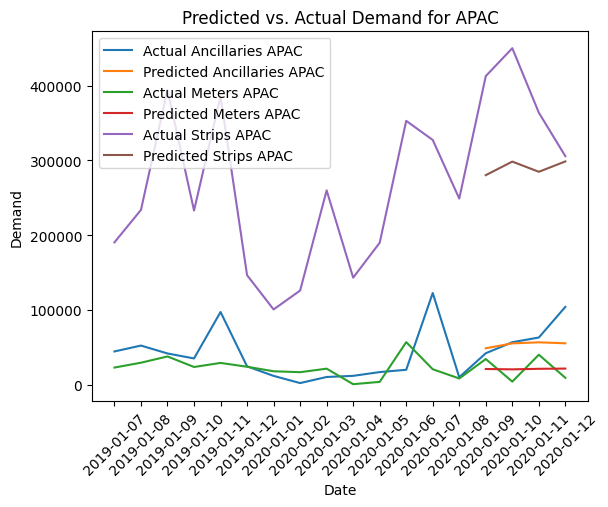

In [ ]:
# Prepare dates for x-axis labels
all_dates = data.index[lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(all_dates, combined_data[lookback:, 0], label='Actual Ancillaries APAC')
plt.plot(all_dates[train_size:], predictions[:, 0], label='Predicted Ancillaries APAC')
plt.plot(all_dates, combined_data[lookback:, 1], label='Actual Meters APAC')
plt.plot(all_dates[train_size:], predictions[:, 1], label='Predicted Meters APAC')
plt.plot(all_dates, combined_data[lookback:, 2], label='Actual Strips APAC')
plt.plot(all_dates[train_size:], predictions[:, 2], label='Predicted Strips APAC')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand for APAC')
plt.legend()
plt.xticks(rotation=45)
plt.show()



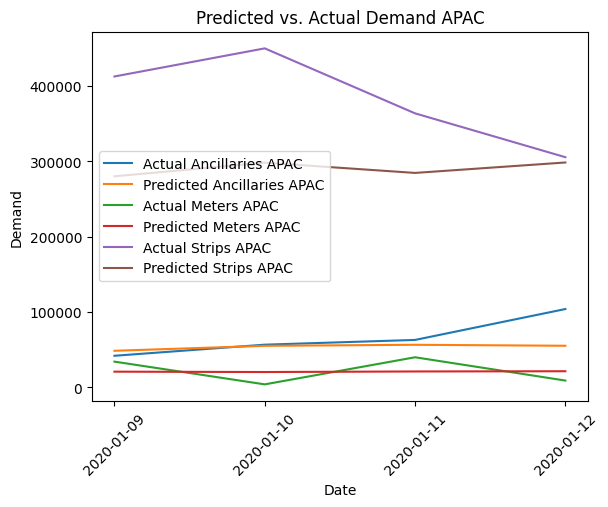

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 0], label='Actual Ancillaries APAC')
plt.plot(test_dates, predictions[:, 0], label='Predicted Ancillaries APAC')
plt.plot(test_dates, y_test[:, 1], label='Actual Meters APAC')
plt.plot(test_dates, predictions[:, 1], label='Predicted Meters APAC')
plt.plot(test_dates, y_test[:, 2], label='Actual Strips APAC')
plt.plot(test_dates, predictions[:, 2], label='Predicted Strips APAC')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand APAC')
plt.legend()
plt.xticks(rotation=45)
plt.show()

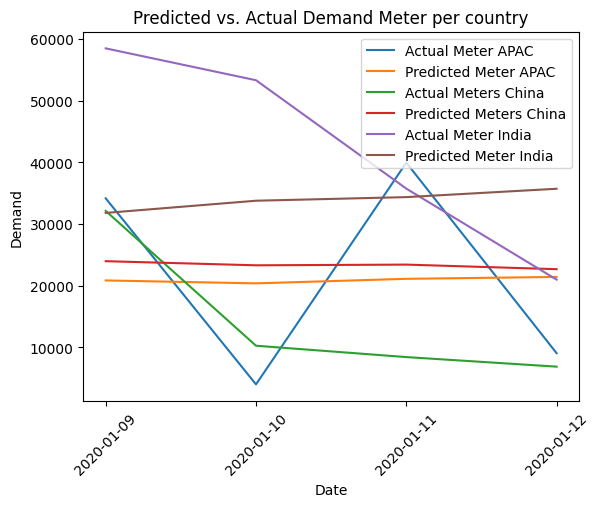

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 1], label='Actual Meter APAC')
plt.plot(test_dates, predictions[:, 1], label='Predicted Meter APAC')
plt.plot(test_dates, y_test[:, 4], label='Actual Meters China')
plt.plot(test_dates, predictions[:, 4], label='Predicted Meters China')
plt.plot(test_dates, y_test[:, 7], label='Actual Meter India')
plt.plot(test_dates, predictions[:, 7], label='Predicted Meter India')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand Meter per country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

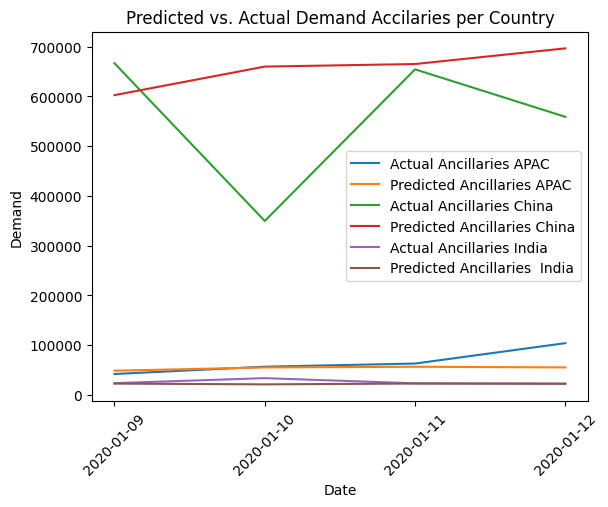

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 0], label='Actual Ancillaries APAC')
plt.plot(test_dates, predictions[:, 0], label='Predicted Ancillaries APAC')
plt.plot(test_dates, y_test[:, 3], label='Actual Ancillaries China')
plt.plot(test_dates, predictions[:, 3], label='Predicted Ancillaries China')
plt.plot(test_dates, y_test[:, 6], label='Actual Ancillaries India')
plt.plot(test_dates, predictions[:, 6], label='Predicted Ancillaries  India')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand Accilaries per Country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

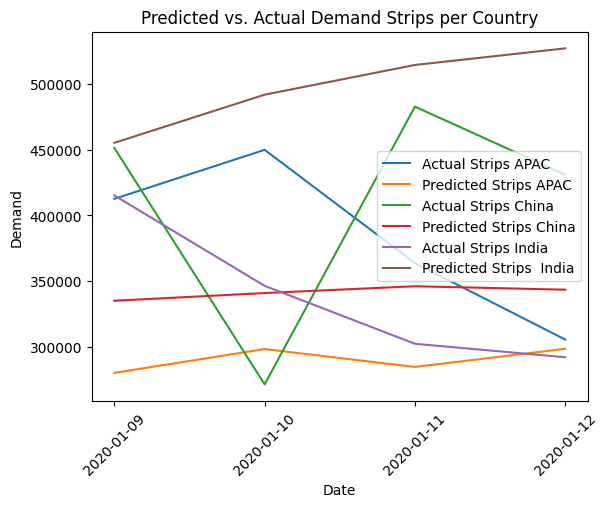

In [ ]:
# Prepare dates for x-axis labels
test_dates = data.index[train_size + lookback:].strftime('%Y-%m-%d')  # Format dates as strings

# Plot the predicted values vs. actual values using original demands
plt.plot(test_dates, y_test[:, 2], label='Actual Strips APAC')
plt.plot(test_dates, predictions[:, 2], label='Predicted Strips APAC')
plt.plot(test_dates, y_test[:, 5], label='Actual Strips China')
plt.plot(test_dates, predictions[:, 5], label='Predicted Strips China')
plt.plot(test_dates, y_test[:, 8], label='Actual Strips India')
plt.plot(test_dates, predictions[:, 8], label='Predicted Strips  India')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Predicted vs. Actual Demand Strips per Country')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a DataFrame to store the actual and predicted values
df_results = pd.DataFrame({'Timestamp': test_dates,
                           'Actual_Ancillaries_APAC': y_test[:, 0],
                           'Predicted_Ancillaries_APAC': predictions[:, 0],
                           'Actual_Ancillaries_China': y_test[:, 3],
                           'Predicted_Ancillaries_China': predictions[:,3],
                           'Actual_Ancillaries_India': y_test[:, 6],
                           'Predicted_Ancillaries_India': predictions[:, 6],
                           'Actual_Meters_APAC': y_test[:, 1],
                           'Predicted_Meters_APAC': predictions[:, 1],
                           'Actual_Meters_China': y_test[:, 4],
                           'Predicted_Meters_China': predictions[:, 4],
                           'Actual_Meters_India': y_test[:, 7],
                           'Predicted_Meters_India': predictions[:, 7],
                           'Actual_Strips_APAC': y_test[:, 2],
                           'Predicted_Strips_APAC': predictions[:, 2],
                           'Actual_Strips_China': y_test[:, 5],
                           'Predicted_Strips_China': predictions[:, 5],
                           'Actual_Strips_India': y_test[:, 8],
                           'Predicted_Strips_India': predictions[:, 8]
                           })



# Export the DataFrame to a CSV file
df_results.to_csv('predictions_LSTM.csv', index=False)  # Replace 'predictions.csv' with the desired file name

In [ ]:
#Google Colab - Change path
file_path = '/content/predictions_LSTM.csv'

# Read the Excel file, specifying the sheet name and the range of rows to read
LSTM_predictions3= pd.read_csv(file_path, sep=',')

In [ ]:
LSTM_predictions3

,Timestamp,Actual_Ancillaries_APAC,Predicted_Ancillaries_APAC,Actual_Ancillaries_China,Predicted_Ancillaries_China,Actual_Ancillaries_India,Predicted_Ancillaries_India,Actual_Meters_APAC,Predicted_Meters_APAC,Actual_Meters_China,Predicted_Meters_China,Actual_Meters_India,Predicted_Meters_India,Actual_Strips_APAC,Predicted_Strips_APAC,Actual_Strips_China,Predicted_Strips_China,Actual_Strips_India,Predicted_Strips_India
0,2020-01-09,41951.0,48579.434,666760.0,602622.10,23561.0,22690.510,34181.0,20864.633,32146.0,23988.002,58509.0,31815.950,412630.0,280147.88,451414.0,335042.66,415224.0,455270.75
1,2020-01-10,56687.0,55139.160,349646.0,660038.94,33661.0,21135.062,4006.0,20390.285,10274.0,23318.482,53340.0,33794.770,449949.0,298268.30,271394.0,340911.72,346405.0,491927.38
2,2020-01-11,62980.0,56532.816,654505.0,665182.90,23223.0,22799.895,39967.0,21125.203,8432.0,23431.928,35759.0,34379.605,363700.0,284637.97,482836.0,346082.97,302287.0,514549.30
3,2020-01-12,103982.0,55242.080,559017.0,696677.50,22352.0,22523.418,9063.0,21431.140,6880.0,22690.848,20996.0,35735.740,305511.0,298491.06,430977.0,343474.47,292043.0,527189.70


In [ ]:
import pandas as pd
import numpy as np

# Create an empty DataFrame to store MAPE, MAE, and MSE
mape_mae_mse_data = pd.DataFrame(columns=['Product', 'Region', 'MAPE', 'MAE', 'MSE'])

# Get the list of products and regions
products = ['Ancillaries', 'Meters', 'Strips']
regions = ['APAC', 'China', 'India']

# Iterate over each product and region combination
for product in products:
    for region in regions:
        # Define the column names for actual and predicted values
        actual_column = 'Actual_{}_{}'.format(product, region)
        predicted_column = 'Predicted_{}_{}'.format(product, region)

        # Filter the actual data for the current product and region
        filtered_data = LSTM_predictions3[[actual_column, predicted_column]]

        # Calculate MAPE, MAE, and MSE
        absolute_error = np.abs(filtered_data[actual_column] - filtered_data[predicted_column])
        absolute_percentage_error = absolute_error / filtered_data[actual_column]
        mape = np.mean(absolute_percentage_error) * 100
        mae = np.mean(absolute_error)
        mse = np.mean(absolute_error**2)

        # Append the results to the mape_mae_mse_data DataFrame
        mape_mae_mse_data = mape_mae_mse_data.append({
            'Product': product,
            'Region': region,
            'MAPE': mape,
            'MAE': mae,
            'MSE': mse
        }, ignore_index=True)

# Display the mape_mae_mse_data DataFrame
print(mape_mae_mse_data)





       Product Region        MAPE           MAE           MSE
0  Ancillaries   APAC   18.910304   15840.84450  6.158695e+08
1  Ancillaries  China   31.162432  130717.31000  2.988047e+10
2  Ancillaries  India   10.873867    3497.73775  3.946632e+07
3       Meters   APAC  157.890977   15227.64725  2.384387e+08
4       Meters  China  140.011408   13003.31400  1.779230e+08
5       Meters  India   39.081235   15589.35375  3.284244e+08
6       Strips   APAC   22.463356   92561.19750  1.171466e+10
7       Strips  China   25.005129  102536.15500  1.118327e+10
8       Strips  India   50.597641  158244.53250  3.078244e+10


**Forecast Metrics ARIMA**

In [ ]:
forecast_metrics_df

,Sub Cluster,Product Type,MAPE,MAE,MSE
0,APAC Distributor,Ancillaries,1.097760,30871.999730,1.414062e+09
1,APAC Distributor,Meters,1.751354,15158.592036,2.364764e+08
2,APAC Distributor,Strips,0.315231,123902.299153,2.111701e+10
3,China,Meters,1.450507,13741.579092,2.157983e+08
4,China,Strips,0.234054,90817.589756,9.023246e+09
5,India,Ancillaries,0.396522,7912.254066,8.262932e+07
6,India,Meters,0.339963,14019.250965,2.564677e+08


In [ ]:
# Filter by column Predicted_Meters APAC, Predicted_Meters China and Predicted_Meters India
LSTM_predictions2 = LSTM_predictions3[['Timestamp', 'Predicted_Meters_APAC', 'Predicted_Meters_China', 'Predicted_Meters_India']]

In [ ]:
LSTM_predictions2

,Timestamp,Predicted_Meters_APAC,Predicted_Meters_China,Predicted_Meters_India
0,2020-01-09,20864.633,23988.002,31815.950
1,2020-01-10,20390.285,23318.482,33794.770
2,2020-01-11,21125.203,23431.928,34379.605
3,2020-01-12,21431.140,22690.848,35735.740


In [ ]:
# Convert to long format
LSTM_predictions2  = pd.melt(LSTM_predictions2 , id_vars=['Timestamp'], value_vars=['Predicted_Meters_APAC', 'Predicted_Meters_China', 'Predicted_Meters_India'],
                  var_name='Sub Cluster', value_name='Forecasted Demand')

# Map the 'Sub Cluster' names to the desired format
sub_cluster_map = {'Predicted_Meters_APAC': 'APAC Distributor',
                   'Predicted_Meters_China': 'China',
                   'Predicted_Meters_India': 'India'}

# Replace the names in the 'Sub Cluster' column
LSTM_predictions2 ['Sub Cluster'] = LSTM_predictions2 ['Sub Cluster'].map(sub_cluster_map)

# Add a 'Product Type' column
LSTM_predictions2 ['Product Type'] = 'Meters'

# Reorder the columns
LSTM_predictions2  = LSTM_predictions2 [['Sub Cluster', 'Product Type', 'Timestamp', 'Forecasted Demand']]

# Rename the 'Timestamp' column to 'Date'
LSTM_predictions2  = LSTM_predictions2.rename(columns={'Timestamp': 'Date'})

# Convert the 'Date' column to the correct date format (Day in the middle)
LSTM_predictions2['Date'] = pd.to_datetime(LSTM_predictions2['Date'], format='%Y-%d-%m')

# Display the DataFrame
print(LSTM_predictions2 )

         Sub Cluster Product Type       Date  Forecasted Demand
0   APAC Distributor       Meters 2020-09-01          20864.633
1   APAC Distributor       Meters 2020-10-01          20390.285
2   APAC Distributor       Meters 2020-11-01          21125.203
3   APAC Distributor       Meters 2020-12-01          21431.140
4              China       Meters 2020-09-01          23988.002
5              China       Meters 2020-10-01          23318.482
6              China       Meters 2020-11-01          23431.928
7              China       Meters 2020-12-01          22690.848
8              India       Meters 2020-09-01          31815.950
9              India       Meters 2020-10-01          33794.770
10             India       Meters 2020-11-01          34379.605
11             India       Meters 2020-12-01          35735.740


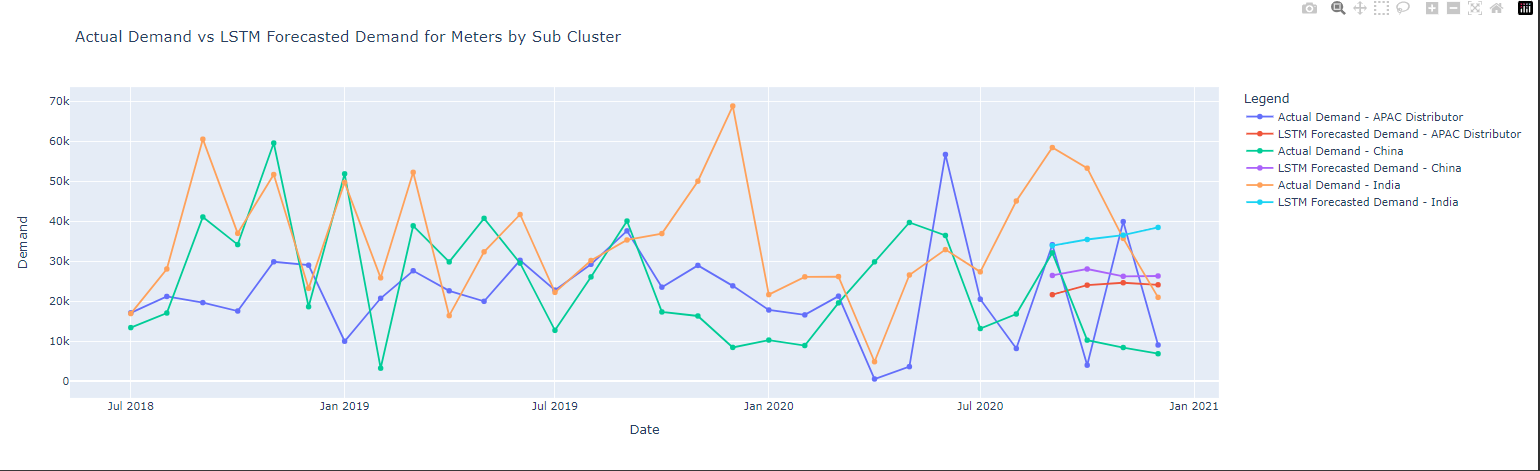

In [ ]:
plot_actual_vs_forecast(df_demand, LSTM_predictions2, 'Actual Demand vs LSTM Forecasted Demand for Meters by Sub Cluster', 'LSTM Forecasted Demand')

LSTM also forecasts the demand quite steady as ARIMA. In comparision the MSE in LSTM is a bit smaller and the depicted trend seems to be also capturing the upwards movement of the demand.